# Wczytanie danych i czyszczenie

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [15]:
data = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
data.sample(frac=0.002).head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
300,79175,1134.729,465.2679,218.1698,80151,317.5039,0.8832,0.9878,0.6828,0.7727,2.1326,0.6824,Çerçevelik
952,61581,943.635,347.2939,227.3190,62377,280.0132,0.7560,0.9872,0.7329,0.8691,1.5278,0.8063,Çerçevelik
1156,86993,1156.065,449.8758,247.2279,87968,332.8106,0.8355,0.9889,0.7099,0.8180,1.8197,0.7398,Çerçevelik
1018,73366,1060.261,416.9208,224.8837,74023,305.6346,0.8421,0.9911,0.7332,0.8201,1.8539,0.7331,Çerçevelik
804,91706,1171.369,453.4358,259.0140,92969,341.7070,0.8208,0.9864,0.7035,0.8399,1.7506,0.7536,Çerçevelik


In [84]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [87]:
data.isnull().any()

Area                 False
Perimeter            False
Major_Axis_Length    False
Minor_Axis_Length    False
Convex_Area          False
Equiv_Diameter       False
Eccentricity         False
Solidity             False
Extent               False
Roundness            False
Aspect_Ration        False
Compactness          False
Class                False
dtype: bool

In [49]:
data['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

nie ma brakow danych, y jest w miare rowno podzielony na klasy, nic z tym nie trzeba robic, wartosci tylko numeryczne/rzeczywiste wiec nie ma one-hota

# Pare plotow

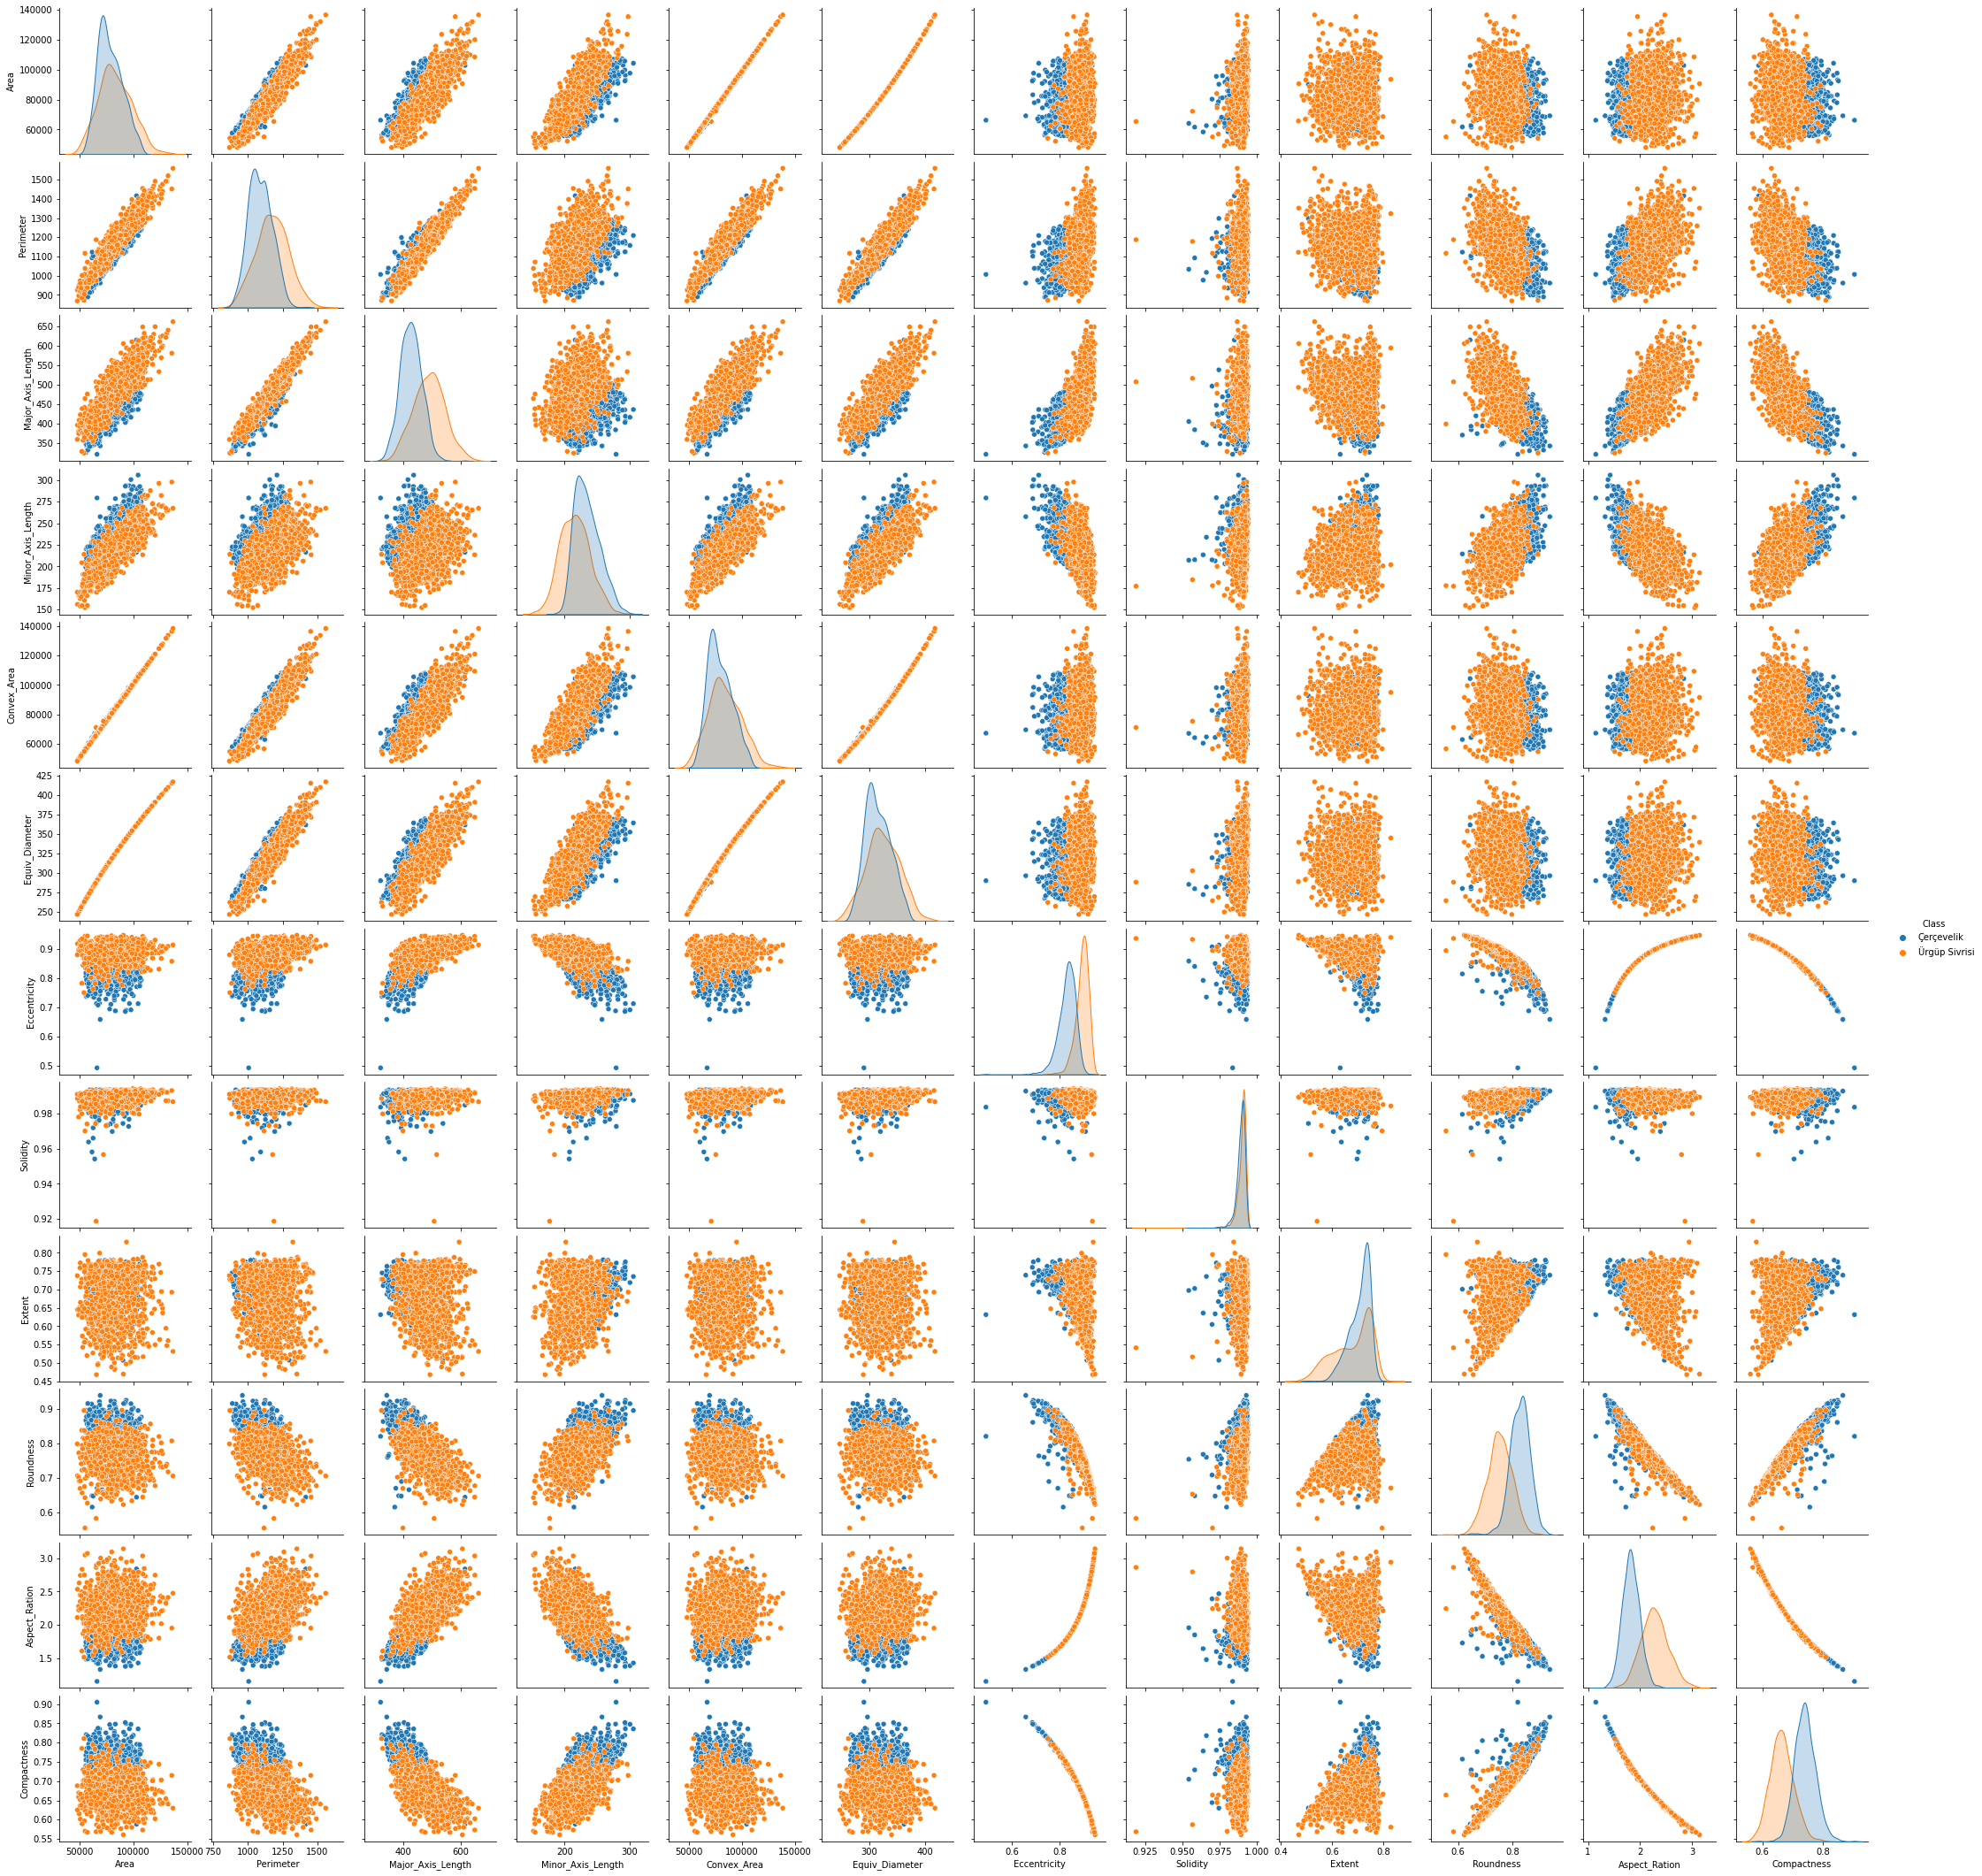

In [88]:
sns.pairplot(data, hue='Class')
plt.show()

Sa istotne roznice miedzy klasami ale nie liniowo podzielne, lecimy z lasem losowym

# Modelowanie

In [69]:
Y = data['Class']
X = data.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
model = RandomForestClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.89      0.94      0.91       869
Ürgüp Sivrisi       0.93      0.88      0.90       806

     accuracy                           0.91      1675
    macro avg       0.91      0.91      0.91      1675
 weighted avg       0.91      0.91      0.91      1675

               precision    recall  f1-score   support

   Çerçevelik       0.87      0.90      0.89       431
Ürgüp Sivrisi       0.89      0.85      0.87       394

     accuracy                           0.88       825
    macro avg       0.88      0.88      0.88       825
 weighted avg       0.88      0.88      0.88       825



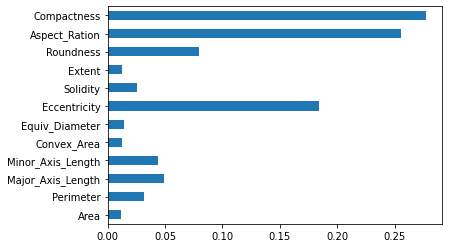

In [41]:
pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh')
plt.show()

Z pierwszego lasu mamy najistotniejsze kolumny, wywalone sa głównie powtarzalne/redundantne informacje o wielkosci danego nasionka dyni.

In [71]:
important=['Compactness', 'Aspect_Ration', 'Roundness', 'Eccentricity', 'Minor_Axis_Length', 'Major_Axis_Length']
Y = data['Class']
X = data.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[important], Y, test_size=0.33, random_state=42)
model2 = RandomForestClassifier(max_depth=5, random_state=0)
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
y_pred = model2.predict(X_test)
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

   Çerçevelik       0.89      0.94      0.92       869
Ürgüp Sivrisi       0.93      0.87      0.90       806

     accuracy                           0.91      1675
    macro avg       0.91      0.91      0.91      1675
 weighted avg       0.91      0.91      0.91      1675

               precision    recall  f1-score   support

   Çerçevelik       0.85      0.90      0.88       431
Ürgüp Sivrisi       0.89      0.83      0.86       394

     accuracy                           0.87       825
    macro avg       0.87      0.86      0.87       825
 weighted avg       0.87      0.87      0.87       825



Na tescie nie daje nam usuniecie tych kolumn lepszego wyniku, wiec nie zostanie.

In [89]:
from sklearn.model_selection import cross_val_score
for i in range(3,15):
  clf = RandomForestClassifier(max_depth=i, random_state=0)
  n=5
  print(f"{n} cross val, max depth= {i}")
  print(sum(cross_val_score(clf, X, Y, cv=n))/n)
  print(sum(cross_val_score(clf, X, Y, cv=n, scoring='f1_macro'))/n)
  print()

5 cross val, max depth= 3
0.8728
0.8721138351813492

5 cross val, max depth= 4
0.8792
0.878632888548513

5 cross val, max depth= 5
0.884
0.8833730850990971

5 cross val, max depth= 6
0.8848
0.8841890076303935

5 cross val, max depth= 7
0.8868
0.8861734332941656

5 cross val, max depth= 8
0.89
0.8894269578299573

5 cross val, max depth= 9
0.8880000000000001
0.8874247469197499

5 cross val, max depth= 10
0.8896000000000001
0.8890337277035064

5 cross val, max depth= 11
0.89
0.8894820148068059

5 cross val, max depth= 12
0.8876
0.8871191861183501

5 cross val, max depth= 13
0.8876
0.8871303543243565

5 cross val, max depth= 14
0.8872
0.8867274341633496



Z krosswalidacji wychodzi że wśród lasów losowych optymalne byłoby użycie lasu losowego o maksymalnej glebokosci 8 lub 11.